# Heart Attact Analysis & Prediction

## What will you learn from this project?
* EDA
* Missing Value Analysis
* Categoric and Numeric Features
* Standardization
* Box - Swarm - Cat - Correlation
* Outlier Detection
* ML Modelling and Tuning Machine Learning Model

## Introduction
* A heart attact, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood.
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.
* Coronary artery disease (CAD) is the main cause of heart attack.

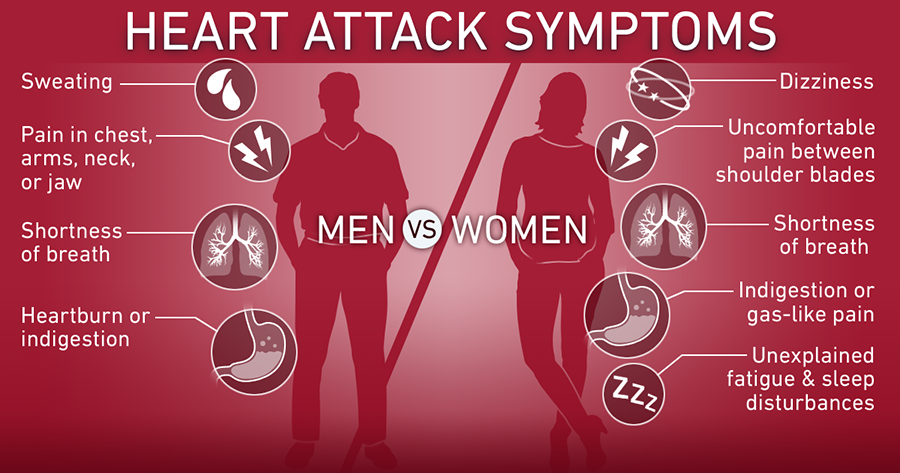

<a id="content"></a>
## Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read & Analyse Data](#3)
4. [Missing Value Analysis](#4)
5. [Unique Value Analysis](#5)
6. [Categorical Feature Analysis](#6)
7. [Numeric Feature Analysis](#7)
8. [Standardization](#8)
9. [Box Plot Analysis](#9)
10. [Swarm Plot Analysis](#10)
11. [Cat Plot Analysis](#11)
12. [Correlation Analysis](#12)
13. [Outlier Detection](#13)
14. [Modelling](#14)
    1. [Encoding Categorical Columns](#14.1)
    2. [Scaling](#14.2)
    3. [Train/Test Split](#14.3)
    4. [Logistic Regression](#14.4)
    5. [Logistic Regression Hyperparamater Tuning](#14.5)
15. [Conclusion](#15)

<a id='1'></a>
## Python Libraries
* In this section, we import used libraries during this kernel.
---
> Back to [Main Content](#content)
<br>
> Next [Content](#2)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


<a id='2'></a>
## Data Content
* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#1)
<br>
> Next [Content](#3)

<a id='3'></a>
## Read & Analyse Data
* In the section, we read heart.csv
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#2)
<br>
> Next [Content](#4)

In [2]:
# Read data
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Describe basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
# Information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id="4"></a>
## Missing Value Analysis
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#3)
<br>
> Next [Content](#5)

In [6]:
df[df.isnull().all(axis=1)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id="5"></a>
## Unique Value Analysis
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#4)
<br>
> Next [Content](#6)

In [8]:
for col in list(df.columns):
    print("{} -- {}".format(col, df[col].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


<a id="6"></a>
## Categorical Feature Analysis
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#5)
<br>
> Next [Content](#7)

In [9]:
categorical_list = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]

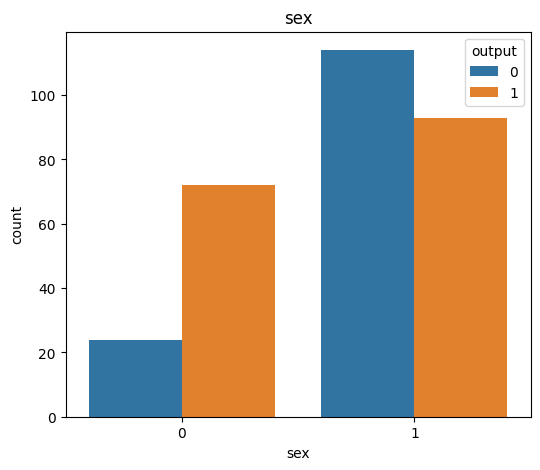

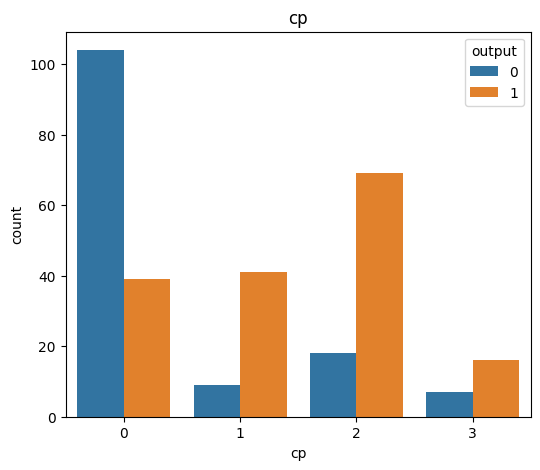

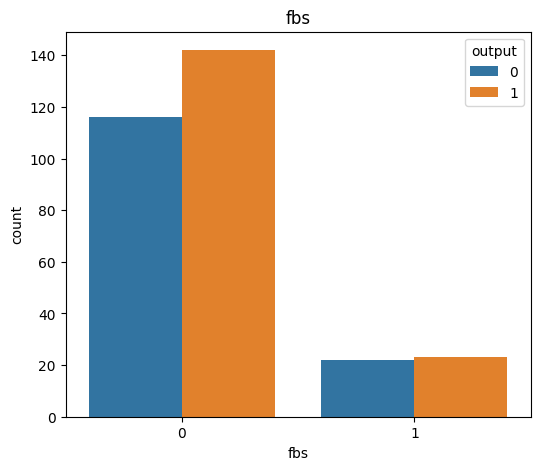

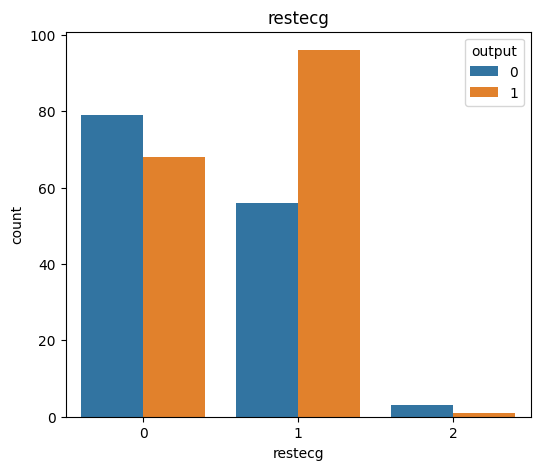

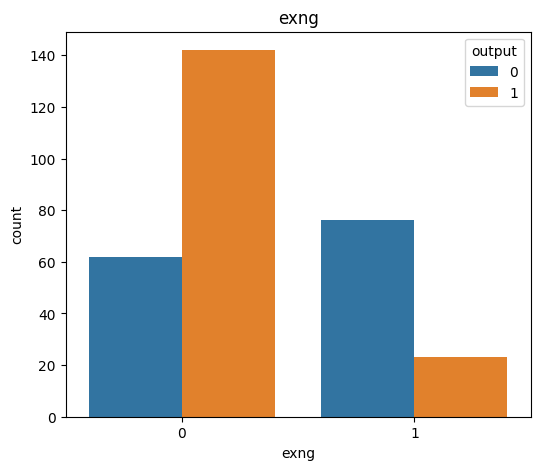

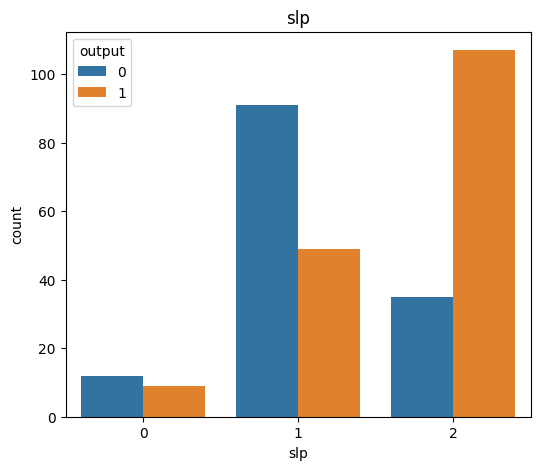

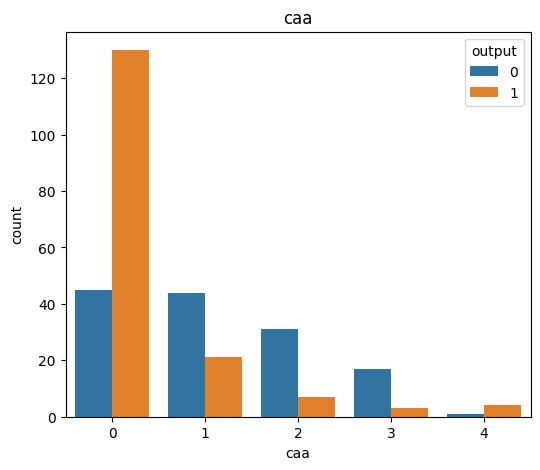

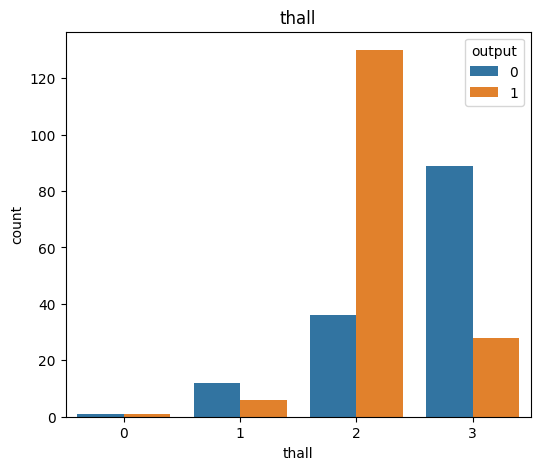

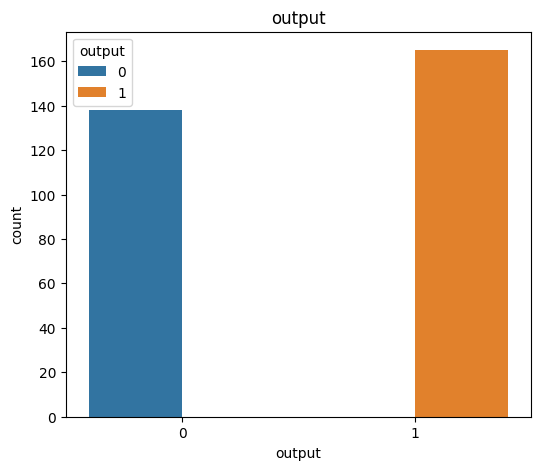

In [10]:
df_categoric = df[categorical_list]

for feature in categorical_list:
    plt.figure(figsize=(6,5))
    sns.countplot(x=feature, data=df_categoric, hue="output")
    plt.title(feature)
    # Output: 0= less chance of heart attack 1= more chance of heart attack
    plt.show()

<a id="7"></a>
## Numeric Feature Analysis
* Bivariate data analysis with scatter plot
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#6)
<br>
> Next [Content](#8)

In [11]:
numeric_list = ["age", "trtbps", "chol", "thalachh", "oldpeak", "output"]

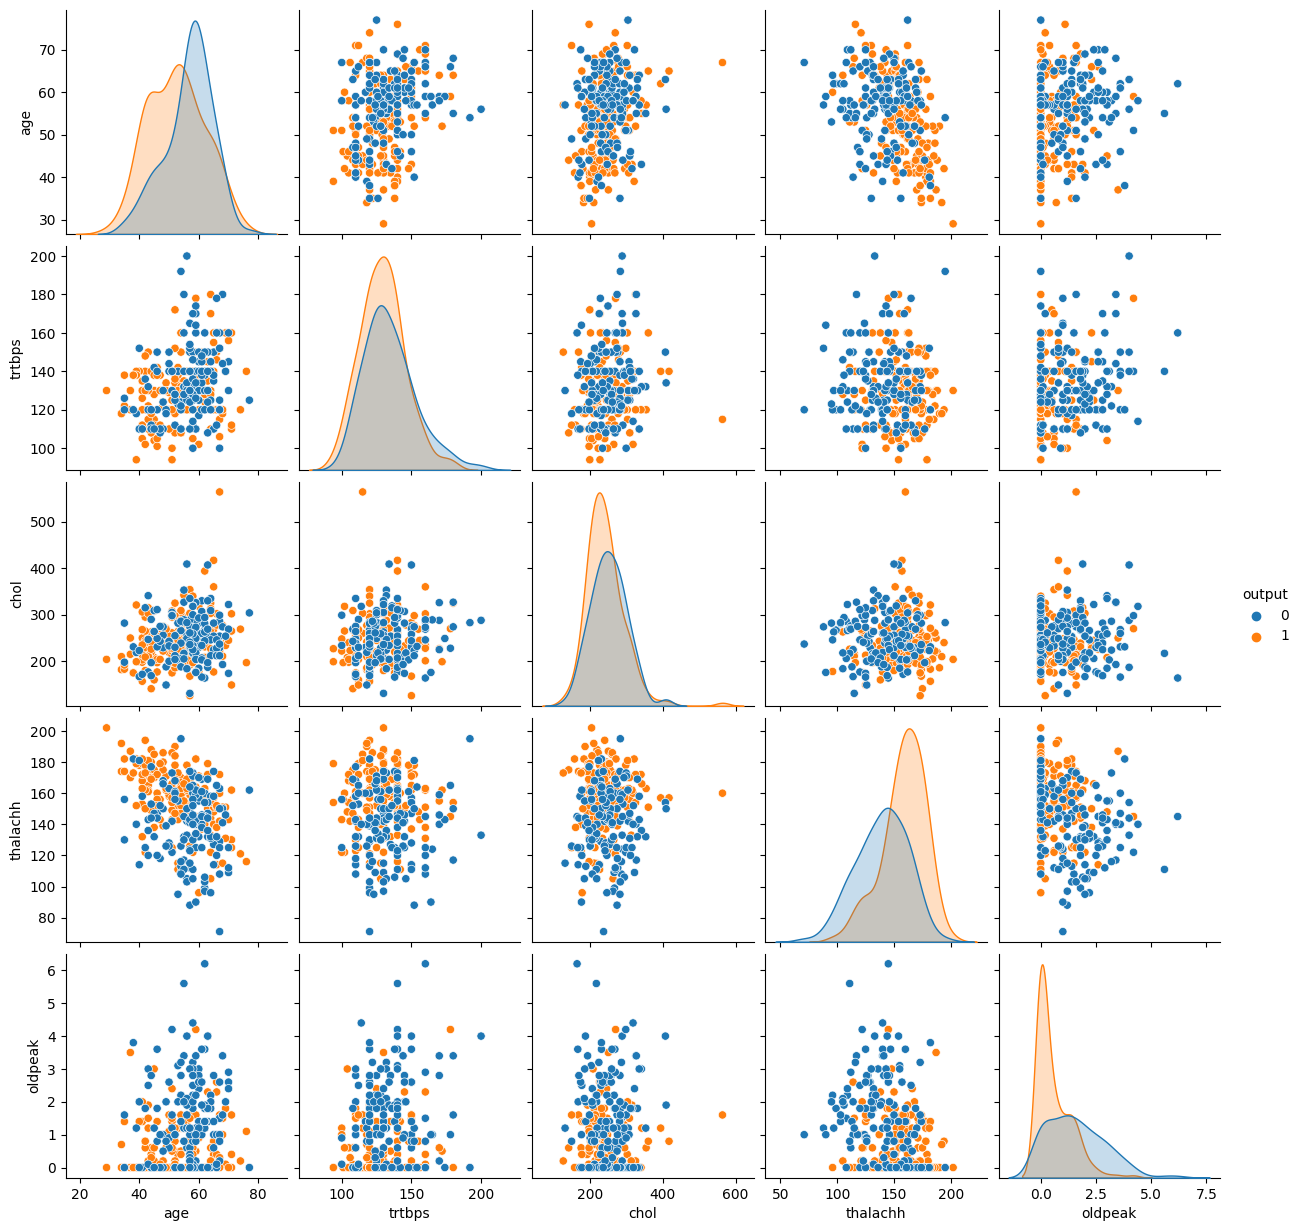

In [12]:
df_numeric = df[numeric_list]

sns.pairplot(data=df_numeric, hue="output", diag_kind="kde")
plt.show()

<a id="8"></a>
## Standardization
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#7)
<br>
> Next [Content](#9)

In [13]:
# Scaler
scaler = StandardScaler()

In [14]:
# Except "output"
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])

<a id="9"></a>
## Box Plot Analysis
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#8)
<br>
> Next [Content](#10)

In [15]:
# Except "output"
df_dummy = pd.DataFrame(scaled_array, columns=numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [16]:
df_dummy = pd.concat([df_dummy, df["output"]], axis=1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [17]:
df_melted = pd.melt(df_dummy, id_vars="output", value_name="value", var_name="features")
df_melted.head()

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464


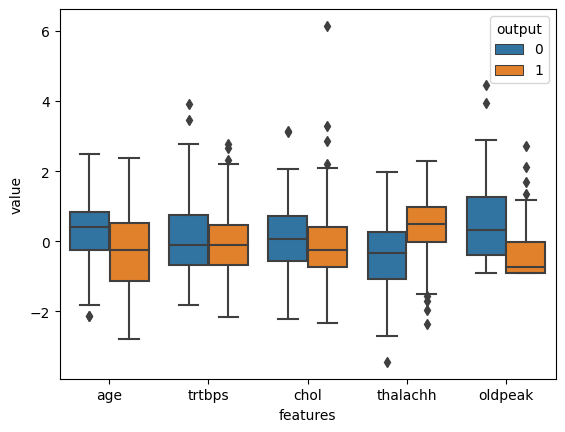

In [18]:
# Box Plot
plt.figure()
sns.boxplot(x="features", y="value", hue="output", data=df_melted)
plt.show()

<a id="10"></a>
## Swarm Plot Analysis
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#9)
<br>
> Next [Content](#11)

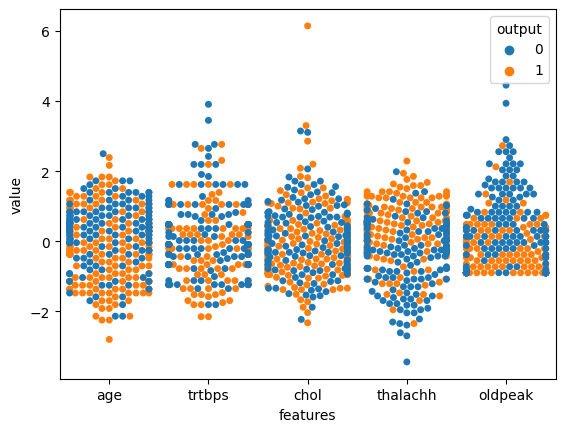

In [19]:
# Swarm Plot
plt.figure()
sns.swarmplot(x="features", y="value", hue="output", data=df_melted)
plt.show()

<a id="11"></a>
## Cat Plot Analysis
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#10)
<br>
> Next [Content](#12)

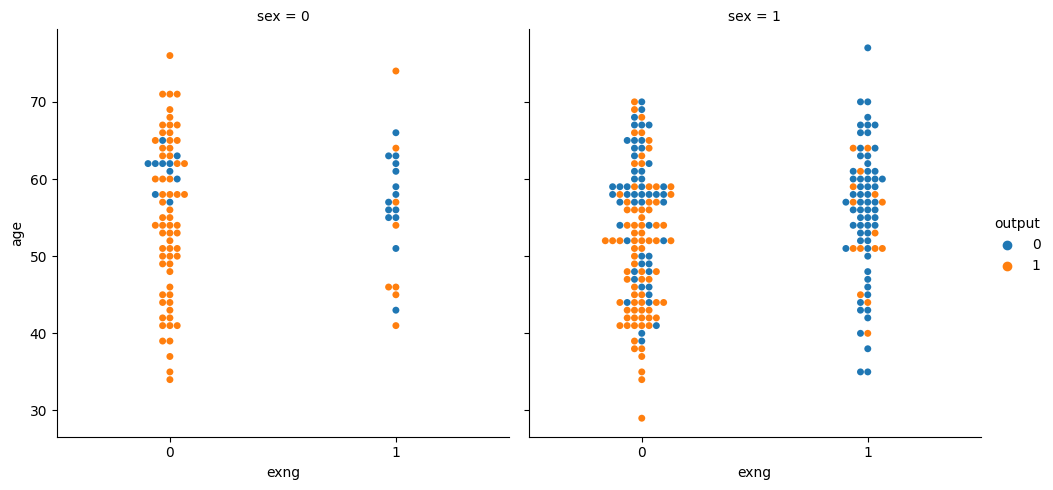

In [20]:
# Swarm Plot
sns.catplot(x="exng", y="age", hue="output", col="sex", kind="swarm", data=df)
plt.show()

<a id="12"></a>
## Correlation Analysis
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#11)
<br>
> Next [Content](#13)

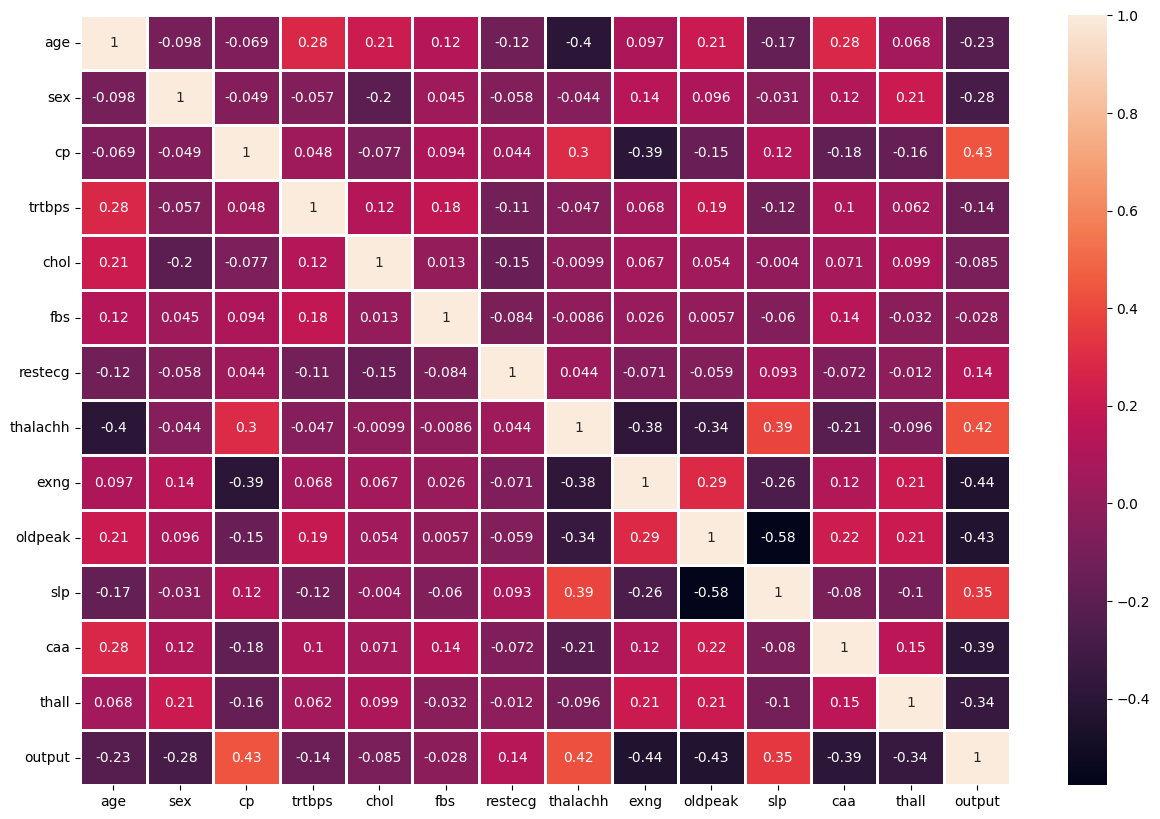

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt=".2g", linewidths=1, )
plt.show()

<a id="13"></a>
## Outlier Detection
* Outliers can disrupt ML process.
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#12)
<br>
> Next [Content](#14)

In [22]:
# Outlier Detection
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    
    IQR = Q3 - Q1
    
    # Upper Bound
    upper = np.where(df[i] >= (Q3 + 1.5 * IQR))
    # Lower Bound
    lower = np.where(df[i] <= (Q1 - 1.5 * IQR))
    
    print(f"{upper} -- {lower}")
    
    try:
        df.drop(upper[0], inplace=True)
    except: 
        print(f"KeyError: {upper[0]} not found in axis")
        
    try:
        df.drop(lower[0], inplace=True)
    except: 
        print(f"KeyError: {lower[0]} not found in axis")
        

(array([], dtype=int64),) -- (array([], dtype=int64),)
(array([  8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292]),) -- (array([], dtype=int64),)
(array([ 27,  84,  95, 214, 237]),) -- (array([], dtype=int64),)
(array([], dtype=int64),) -- (array([255]),)
(array([195, 210, 211, 235, 273, 276]),) -- (array([], dtype=int64),)
KeyError: [195 210 211 235 273 276] not found in axis
(array([], dtype=int64),) -- (array([], dtype=int64),)


<a id="14"></a>
## Modelling
* [Encoding Categorical Columns](#14.1)
* [Scaling](#14.2)
* [Train/Test Split](#14.3)
* [Logistic Regression](#14.4)
* [Logistic Regression Hyperparamater Tuning](#14.5)
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#13)
<br>
> Next [Content](#15)

In [23]:
df_encoding = df.copy()

<a id="14.1"></a>
### Encoding Categorical Columns
* One Hot
---
> Back to [Main Content](#content)
<br>
> Back to [Modelling](#14)

In [24]:
df_encoding = pd.get_dummies(df_encoding, columns=categorical_list[:-1], drop_first=True)
df_encoding.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [25]:
#
x = df_encoding.drop(["output"], axis=1)
y = df_encoding[["output"]]

<a id="14.2"></a>
### Scaling
---
> Back to [Main Content](#content)
<br>
> Back to [Modelling](#14)

In [26]:
scaler = StandardScaler()

In [27]:
# Except "output"
x[numeric_list[:-1]] = scaler.fit_transform(x[numeric_list[:-1]])

In [28]:
x.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.957206,1.049817,-0.231231,0.005804,1.126430,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.871129,0.027128,0.095197,1.610888,2.182516,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.436001,0.027128,-0.788078,0.960179,0.334365,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.195731,-0.654665,-0.173626,1.220462,-0.193678,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.304513,-0.654665,2.092165,0.569753,-0.369692,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


<a id="14.3"></a>
### Train/Test Split
---
> Back to [Main Content](#content)
<br>
> Back to [Modelling](#14)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=3)
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (255, 22)
x_test: (29, 22)
y_train: (255, 1)
y_test: (29, 1)


<a id="14.4"></a>
### Logistic Regression
---
> Back to [Main Content](#content)
<br>
> Back to [Modelling](#14)

In [30]:
logreg = LogisticRegression()

In [31]:
# Fitting = Training
logreg.fit(x_train, y_train)

LogisticRegression()

In [32]:
# Calculate Probabilities
y_pred_prob = logreg.predict_proba(x_test)

In [33]:
y_pred = np.argmax(y_pred_prob, axis=1)

In [34]:
dummy_ = pd.DataFrame(y_pred_prob)
dummy_["y_pred"] = y_pred
dummy_.head()

,0,1,y_pred
0,0.009903,0.990097,1
1,0.660256,0.339744,0
2,0.051043,0.948957,1
3,0.329422,0.670578,1
4,0.256838,0.743162,1


In [35]:
# Accuracy
print(f"Test accuracy: {accuracy_score(y_pred, y_test)}")

Test accuracy: 0.896551724137931


In [36]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, -1])

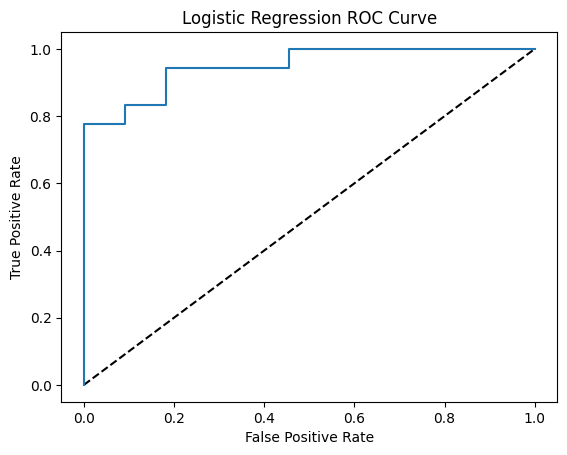

In [37]:
# Plot Curve
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

<a id="14.5"></a>
### Logistic Regression Hyperparamater Tuning
---
> Back to [Main Content](#content)
<br>
> Back to [Modelling](#14)

In [38]:
lr = LogisticRegression()

In [39]:
penalty = ["l1", "l2"]
parameters = {"penalty": penalty}

In [40]:
lr_searcher = GridSearchCV(lr, parameters)

In [41]:
lr_searcher.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [42]:
print(f"Best Parameters: {lr_searcher.best_params_}")

Best Parameters: {'penalty': 'l2'}


In [43]:
y_pred = lr_searcher.predict(x_test)

In [44]:
# Accuracy
print(f"Test accuracy: {accuracy_score(y_pred, y_test)}")

Test accuracy: 0.896551724137931


<a id="15"></a>
## Conclusion
---
> Back to [Main Content](#content)
<br>
> Previous [Content](#14)